In [1]:
#This program will use an artificial neural network called Long Short Term Memory (LSTM)
#to predict the closing stock price of a corporation, in our case Apple, using the past 
#60 day stock price 

In [5]:
import math 
import pandas_datareader as web 
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
from datetime import datetime
plt.style.use('fivethirtyeight')

In [7]:
#get the stock quote and info 
df = web.DataReader('AAPL', data_source='yahoo', start='2017-01-01', end=datetime.today())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.459938
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.429203
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.568691
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.876030
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,28.131361
...,...,...,...,...,...,...
2021-02-08,136.960007,134.919998,136.029999,136.910004,71297200.0,136.910004
2021-02-09,137.880005,135.850006,136.619995,136.009995,76774200.0,136.009995
2021-02-10,136.990005,134.399994,136.479996,135.389999,73046600.0,135.389999


In [8]:
#Lets see how many data observations we have 
df.shape 

(1036, 6)

Text(0, 0.5, 'Close Price USD')

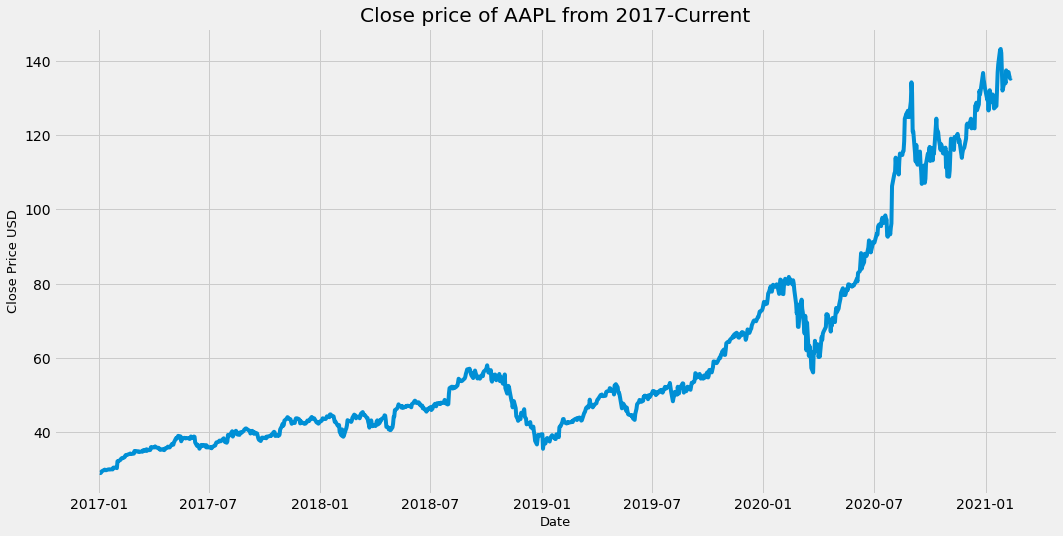

In [11]:
#Visualize our closing price over the timeframe
plt.figure(figsize=(16,8))
plt.title('Close price of AAPL from 2017-Current')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=13)
plt.ylabel('Close Price USD', fontsize=13)

In [12]:
#Create df for just the closing data and convert it to a numpy array 
data = df.filter(['Close'])
dataset = data.values 
#get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

829

In [13]:
#scale the data 
#advantageous to apply pre-processing transformations, scaling, or normalizations to input data before it 
#is inputted into a neural network 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[2.84711308e-04],
       [0.00000000e+00],
       [1.29211148e-03],
       ...,
       [9.31934616e-01],
       [9.29657059e-01],
       [9.31759378e-01]])

In [15]:
#Create the training dataset 
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len]
#Split the dataset into x_train and y_train datasets
x_train=[]
y_train=[]
#x_trian will be the independent training features 
#y_train will be the depenndent variable/target variable

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()
    
        

[array([0.00028471, 0.        , 0.00129211, 0.00413912, 0.00650432,
       0.00676712, 0.00816873, 0.00707372, 0.00661382, 0.00871623,
       0.00869432, 0.00823442, 0.00871623, 0.00889143, 0.00865053,
       0.01283343, 0.01296484, 0.01298673, 0.01228593, 0.01167273,
       0.02787877, 0.02739696, 0.02860147, 0.03125136, 0.03396698,
       0.03508387, 0.03591608, 0.03525907, 0.03782137, 0.04161011,
       0.04268319, 0.04233281, 0.0431431 , 0.0452893 , 0.04618721,
       0.044917  , 0.04520171, 0.04579299, 0.04592442, 0.05205641,
       0.05023873, 0.05203452, 0.05107091, 0.05146513, 0.05032632,
       0.0496255 , 0.05063292, 0.05076431, 0.05030443, 0.05352374,
       0.05402743, 0.05249443, 0.05571374, 0.05216591, 0.05562612,
       0.05453112, 0.05391792, 0.05444354, 0.06083835, 0.06153913])]
[0.06112302337210834]

[array([0.00028471, 0.        , 0.00129211, 0.00413912, 0.00650432,
       0.00676712, 0.00816873, 0.00707372, 0.00661382, 0.00871623,
       0.00869432, 0.00823442, 0.00

In [16]:
#Convert the x_train and y_train to np arrays so we can use them to train the LSTM model 
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
#Reshape the data 
#Reshape because the LSTM network expects the input to be 3D in terms of #samples, #timesteps, #features
#and right now our dataset is 2D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(769, 60, 1)

In [20]:
#build the LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False,))
model.add(Dense(25))
model.add(Dense(1))

In [21]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
#optimizer improves the loss function
#loss function measures how well the model did on training 


In [22]:
#Train the mdoel 
model.fit(x_train, y_train, batch_size=1, epochs=1)
#epochs is the numbe rof iterations when the entire dataset is passed forward and backward through a neural network

769/769 [==============================] - 20s 23ms/step - loss: 0.0021


In [23]:
#Create the testing dataset 
#Create a new array containing scaled values from the last 20% of our original data
test_data = scaled_data[training_data_len-60:, :]
#Create the datasets x_test and y_test 
x_test =[]
y_test = dataset[training_data_len:, :]
#y_test are the values that we want our model to predict 
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [24]:
#Convert the data to a numpy array so we can use in the LSTM model
x_test=np.array(x_test)

In [29]:
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(207, 60, 1)

In [30]:
#Get the model's predicted price values 
#We want the predictions to be the same as the y_test values because that shows the predictive capability 
#of the model
predictions = model.predict(x_test)
#we are inverse transforming to essentially unscale the values so we can compare it to our y_test values
predictions = scaler.inverse_transform(predictions)

In [31]:
#Evaluate the model by getting the root mean squared error (RMSE)
#Stdev of the residuals 
#The lower values of RMSE indicate a better fit 
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.5018278112733997

<ipython-input-33-63e4309fdffa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


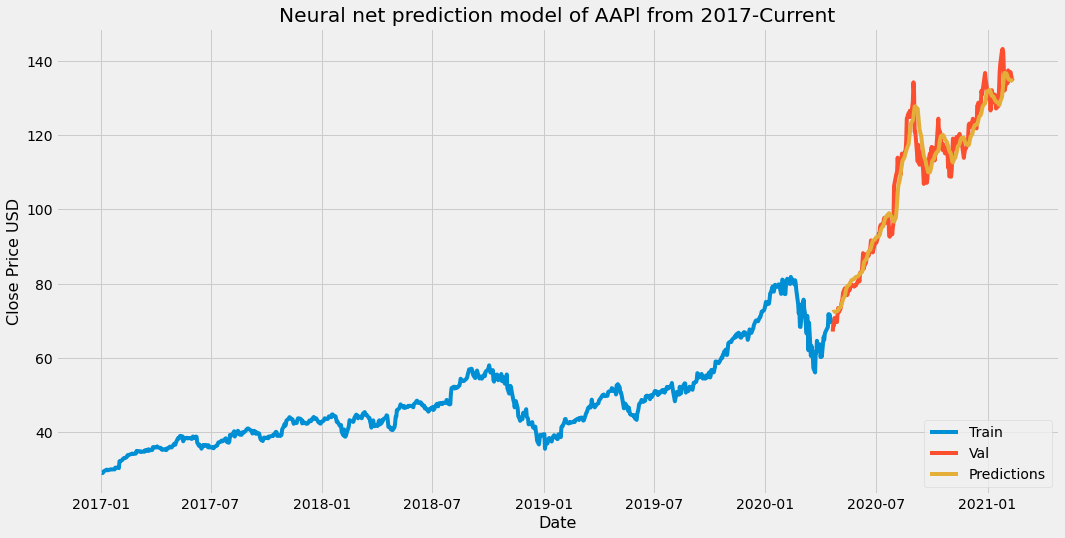

In [33]:
#We have a rmse of 0.5 which is really good because a value of 0 would mean the predictions were exactly perfect
#Plot the data now
train= data[:training_data_len]
valid= data[training_data_len:]
valid['Predictions']= predictions
#Visualize the data 
plt.figure(figsize=(16,8))
plt.title('Neural net prediction model of AAPL from 2017-Current')
plt.ylabel('Close Price USD', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')

In [34]:
#Show the valid and predicted prices 
valid

,Close,Predictions
Date,,
2020-04-21,67.092499,72.308937
2020-04-22,69.025002,72.432411
2020-04-23,68.757500,72.464516
2020-04-24,70.742500,72.399689
2020-04-27,70.792503,72.466560
...,...,...
2021-02-08,136.910004,134.783493
2021-02-09,136.009995,134.737320
2021-02-10,135.389999,134.655991


In [40]:
#Lets try and predict the stock price of a specific day
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2017-01-01', end='2021-04-12')
#Create a new dataframe
new_df=apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test=[]
#Append the last 60 days to this list 
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to a np array 
X_test= np.array(X_test)
#reshape it 
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price 
pred_price=model.predict(X_test)
#undo the scaling
pred_price= scaler.inverse_transform(pred_price)
print(pred_price)

[[134.1559]]


In [42]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-02-12', end='2021-02-12')
print(apple_quote2['Close'])

Date
2021-02-12    135.369995
2021-02-12    135.369995
Name: Close, dtype: float64
